   <h1>
    <center>KISHAN SAHU<center>
    <center>Data Science and Business Analytics Intern at The Sparks Foundation<center>
   <h1>

## Task-1 : Predict the Iris Species

# Importing Libraries

In [54]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score

# Importing Dataset

In [6]:
df = pd.read_csv('/home/kishan/Downloads/Datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Drop first column which is not necessary for dataset

In [8]:
df.drop("Id", axis=1, inplace = True)

Check duplicated rows n a dataset

In [9]:
df.duplicated().sum()

3

Drop duplicated rows in the dataset

In [11]:
df = df.drop_duplicates()

Check null values(missing values) in the dataset

In [12]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df.shape

(147, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    147 non-null float64
SepalWidthCm     147 non-null float64
PetalLengthCm    147 non-null float64
PetalWidthCm     147 non-null float64
Species          147 non-null object
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Description of dataset
 
Let’s look at a summary of each iris instance attributes.

In [16]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Description of class
 
Now, the time to view how many instances the data frame contains.

In [19]:
df.groupby('Species').size()a

Species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64

In [23]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Pair plot
 
The pair plot used to figure out a distribution of single variables and the relationship between two variables. If the pair plot is given a solution for that as a clear understanding of each flower sets at a single graph. Each flower scatters plots represented in different colors.

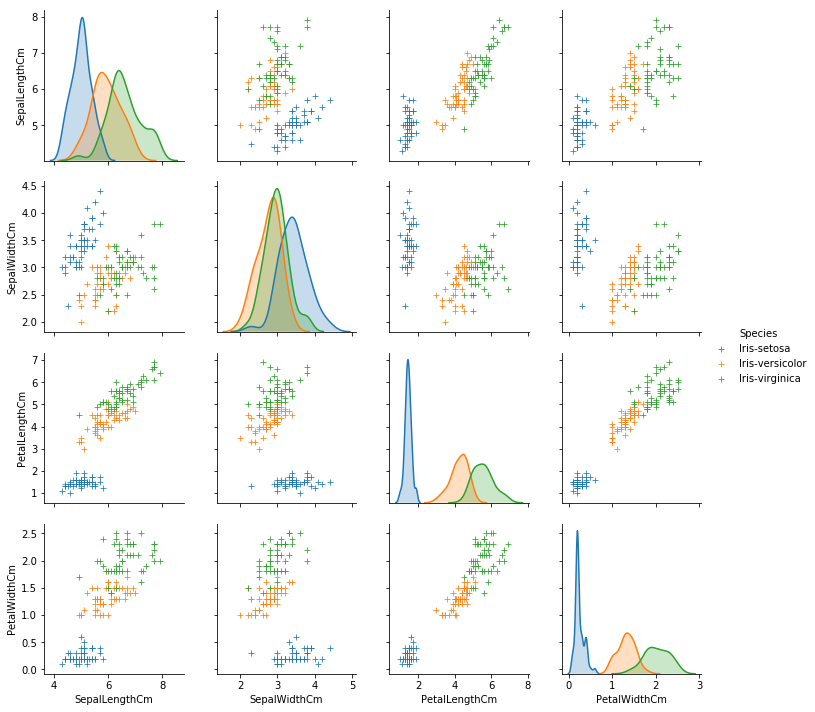

In [25]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

# Boxplot
* The graph represented the shape of data distribution and their upper and lower quartiles.
* The iris species might show with few box plot standard ways such as mean, median, and deviation.

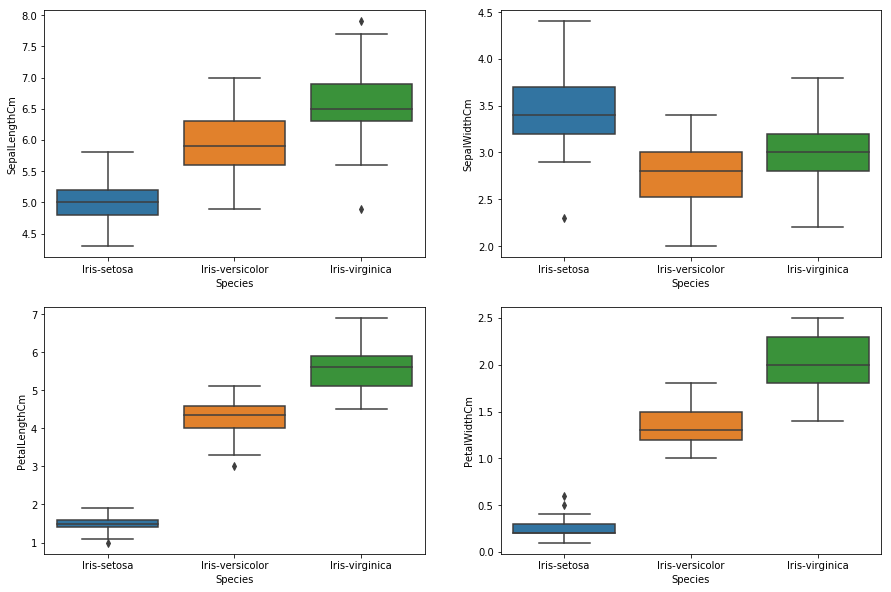

In [28]:
#Boxplot    
plt.figure(figsize=(15,10))    
plt.subplot(2,2,1)    
sns.boxplot(x='Species',y='SepalLengthCm',data=df)    
plt.subplot(2,2,2)    
sns.boxplot(x='Species',y='SepalWidthCm',data=df)    
plt.subplot(2,2,3)    
sns.boxplot(x='Species',y='PetalLengthCm',data=df)    
plt.subplot(2,2,4)    
sns.boxplot(x='Species',y='PetalWidthCm',data=df)

## Feature Extraction and Test-Train-Split

In [30]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 4)
(30, 4)
(117, 1)
(30, 1)


## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1000, random_state = 40)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))


cm = confusion_matrix(y_test, y_pred)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print(cm)

training accuracy : 0.9658119658119658
testing accuracy : 0.9666666666666667
Accuracy =  0.9666666666666667
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


/home/devendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/devendra/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devendra/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6, random_state=4)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test ,y_test))


print("Accuracy = ",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

training accuracy : 1.0
testing accuracy : 1.0
Accuracy =  1.0


## Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print(cm)

training accuracy : 0.9914529914529915
testing accuracy : 0.9666666666666667
Accuracy =  0.9666666666666667
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]


/home/devendra/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
